# Task 2.3 - Random Forest for Heathrow data (all years)

### Importing Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [6]:
path = r'C:\Users\gre60\OneDrive\CareerFoundry Data Analytics Program\Machine Learning with Python'

In [8]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [12]:
# Import cleaned weather observations data

X = pd.read_csv(os.path.join(path, 'X_cleaned.csv'), index_col = False)

In [16]:
# Import predictions data

answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [18]:
X.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0            10.9                     1               0.81             1.0195   
1            10.1                     6               0.84             1.0172   
2             9.9                     6               0.77             1.0179   
3            10.6                     8               0.93             1.0268   
4             6.0                     8               0.99             1.0286   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                       0.88                    0.00                7.0   
1                       0.25                    0.00                0.0   
2                       0.67                    0.00                3.5   
3                       0.25                    0.00                0.0   
4                       0.25                    0.06                0.0   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0                 3.7               -0.9                7.9   
1                 2.9                2.2                4.4   
2                 3.1               -0.5                6.4   
3                 2.0               -2.0                3.0   
4                 2.0                0.7                2.8   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   
1                     4               0.67              1.017   
2                     4               0.67              1.017   
3                     4               0.67              1.017   
4                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   
1                       0.18                    0.31                0.0   
2                       0.30                    0.00                0.6   
3                       0.19                    0.00                0.0   
4                       0.19                    0.00                0.0   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0                 2.4               -0.4                5.1   
1                 2.3                1.4                3.1   
2                 2.7                1.7                5.3   
3                 2.0                0.4                4.4   
4                 2.5                1.1                5.3   

   DEBILT_cloud_cover  DEBILT_humidity  DEBILT_pressure  \
0                   7             0.85           1.0032   
1                   8             0.90           1.0056   
2                   6             0.92           1.0165   
3                   8             0.95           1.0265   
4                   6             0.90           1.0243   

   DEBILT_global_radiation  DEBILT_precipitation  DEBILT_sunshine  \
0                     0.07                  0.25              0.0   
1                     0.14              

In [20]:
X.shape

(22950, 135)

In [22]:
answers.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

### Data Wrangling

In [25]:
# Create a list of the columns containing "Heathrow" in their names

heathrow_list = list(x for x in X.columns if x.find('HEATHROW') >=0)
heathrow_list

['HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max']

In [27]:
# Create a dataframe with those columns

df_heathrow = X[heathrow_list]
df_heathrow

HEATHROW_cloud_cover  HEATHROW_humidity  HEATHROW_pressure  \
0                         7               0.91             1.0010   
1                         7               0.98             1.0051   
2                         8               0.96             1.0166   
3                         8               0.98             1.0230   
4                         5               0.84             1.0275   
...                     ...                ...                ...   
22945                     5               0.87             1.0140   
22946                     4               0.82             1.0152   
22947                     7               0.85             1.0138   
22948                     5               0.86             1.0147   
22949                     5               0.89             1.0107   

       HEATHROW_global_radiation  HEATHROW_precipitation  HEATHROW_sunshine  \
0                           0.13                    0.22                0.0   
1                           0.13                    0.23                0.0   
2                           0.15                    0.07                0.1   
3                           0.13                    0.00                0.0   
4                           0.30                    0.00                2.1   
...                          ...                     ...                ...   
22945                       1.18                    0.16                1.9   
22946                       1.18                    0.16                4.2   
22947                       1.18                    0.16                4.2   
22948                       1.18                    0.16                0.6   
22949                       1.18                    0.16                3.7   

       HEATHROW_temp_mean  HEATHROW_temp_min  HEATHROW_temp_max  
0                    10.6                9.4                8.3  
1                     6.1                3.9               10.6  
2                     8.4                6.1               12.2  
3                     9.4                6.7                8.9  
4                     8.9                8.9                7.2  
...                   ...                ...                ...  
22945                16.4               11.9               18.9  
22946                15.8               12.7               21.8  
22947                16.5               11.2               17.0  
22948                15.2               13.4               17.5  
22949                13.7                9.8               17.6  

[22950 rows x 9 columns]

In [29]:
# Reduce answers dataset to Heathrow's answers only

answers_heathrow = answers['HEATHROW_pleasant_weather']
answers_heathrow

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: HEATHROW_pleasant_weather, Length: 22950, dtype: int64

In [31]:
df_heathrow.shape # observations dataset has the correct shape

(22950, 9)

In [33]:
answers_heathrow.shape # predictions dataset has the correct shape

(22950,)

### Reshaping for Modeling

In [36]:
X2 = df_heathrow

In [38]:
y2 = answers_heathrow

In [40]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [42]:
X.shape

(22950, 9)

In [44]:
y.shape

(22950,)

### Data Split

In [47]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [49]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [51]:
X_train

array([[ 7.    ,  0.77  ,  1.0144, ..., 15.8   , 12.5   , 20.3   ],
       [ 3.    ,  0.71  ,  1.0171, ...,  1.3   , -2.7   ,  7.    ],
       [ 3.    ,  0.81  ,  1.0116, ..., -2.8   , -5.7   ,  0.8   ],
       ...,
       [ 8.    ,  0.9   ,  1.0115, ...,  8.3   ,  6.8   , 12.4   ],
       [ 6.    ,  0.83  ,  1.0121, ..., 11.6   ,  8.1   , 16.8   ],
       [ 2.    ,  0.59  ,  1.0257, ...,  9.2   ,  4.2   , 11.8   ]])

In [53]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
X_test

array([[ 3.    ,  0.61  ,  1.0171, ..., 13.6   ,  8.2   , 18.1   ],
       [ 7.    ,  0.88  ,  0.9977, ...,  5.9   ,  0.8   , 11.1   ],
       [ 7.    ,  0.7   ,  1.0043, ..., 19.4   , 14.6   , 24.6   ],
       ...,
       [ 6.    ,  0.85  ,  1.0095, ..., 15.4   , 12.1   , 21.7   ],
       [ 5.    ,  0.72  ,  1.0264, ...,  8.7   ,  2.9   , 15.    ],
       [ 4.    ,  0.58  ,  1.022 , ..., 14.2   ,  9.9   , 18.6   ]])

In [57]:
y_test

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

### Random Forest Model

In [60]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


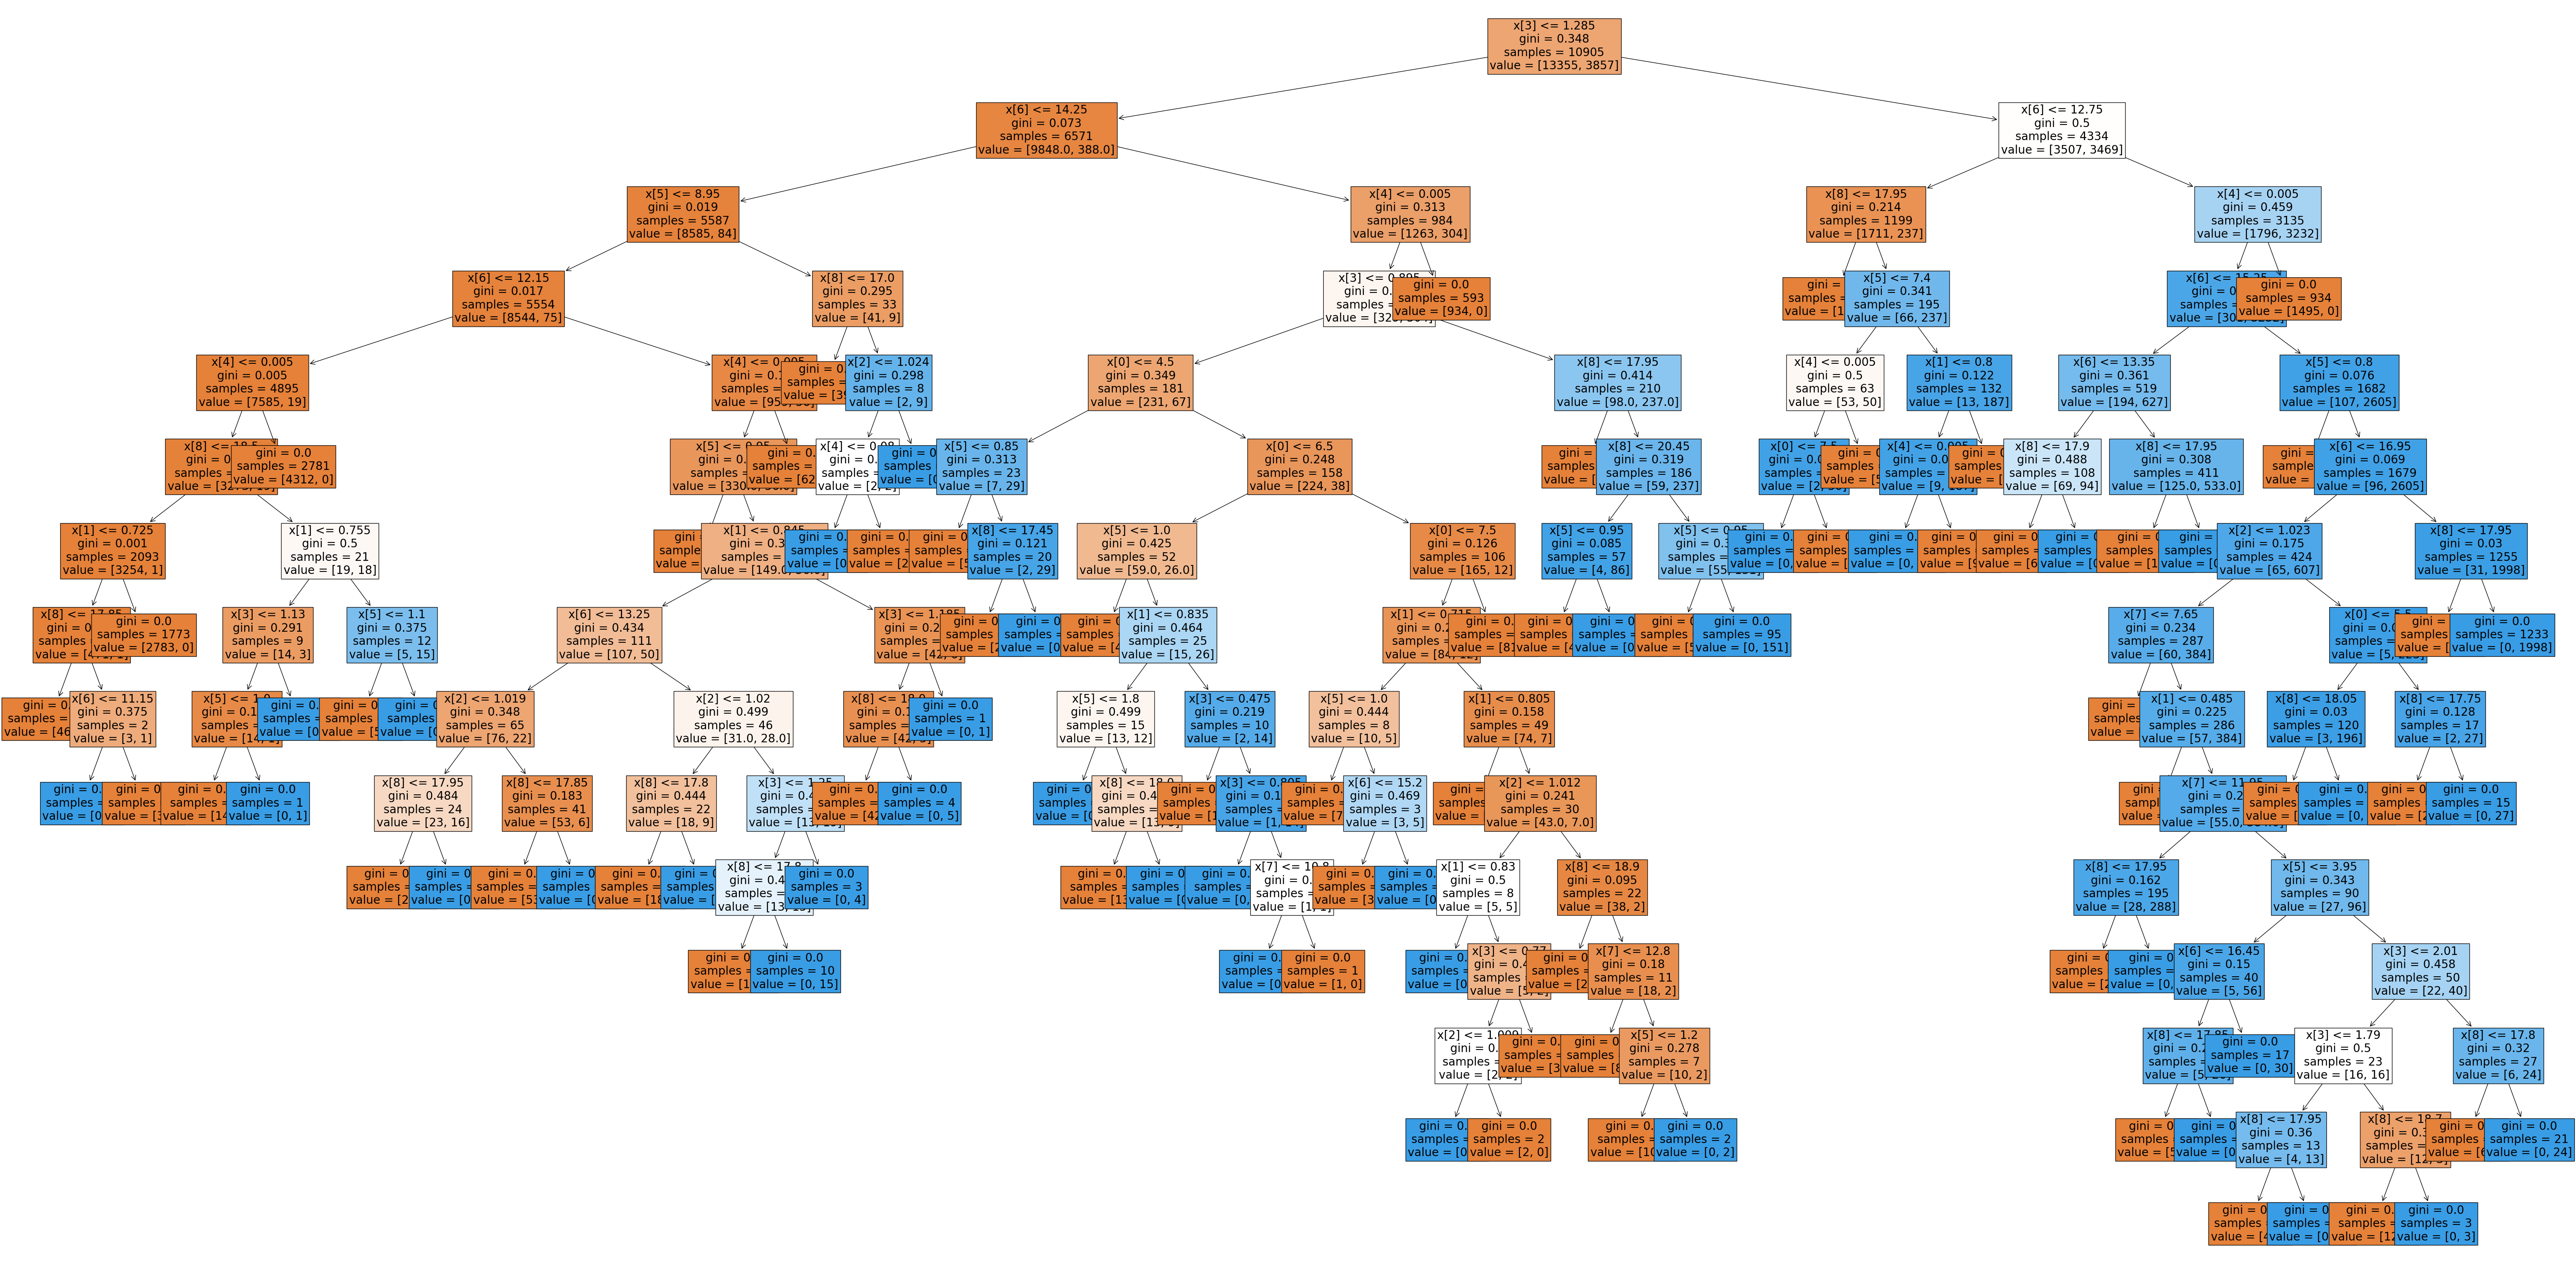

In [64]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [66]:
fig.savefig(os.path.join(path, 'random_forest_Heathrow.png'),bbox_inches='tight')

### Uncovering Feature Importances

In [69]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.01418941, 0.03330031, 0.0171454 , 0.06309698, 0.31177042,
       0.07756917, 0.12001716, 0.01272277, 0.35018837])

In [71]:
# Create a list of weather features

wx_list = [feature.replace('HEATHROW_', '') for feature in heathrow_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [73]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.014189
humidity            0.033300
pressure            0.017145
global_radiation    0.063097
precipitation       0.311770
sunshine            0.077569
temp_mean           0.120017
temp_min            0.012723
temp_max            0.350188
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


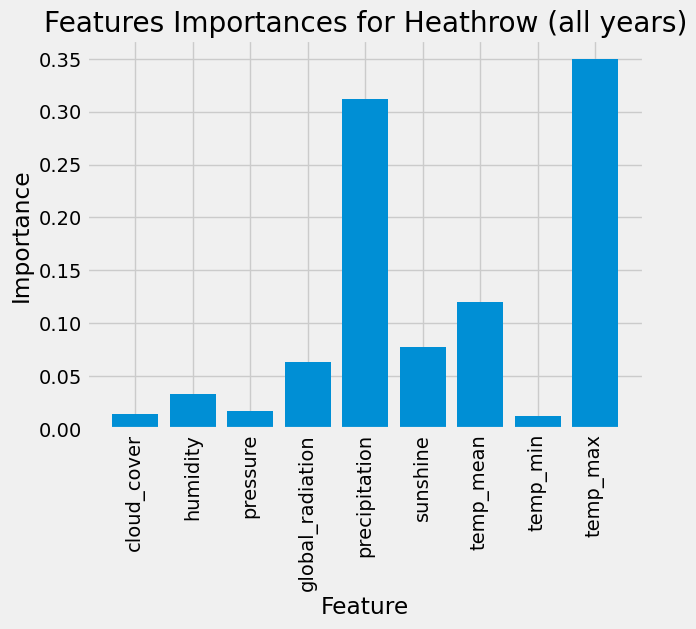

In [77]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Heathrow (all years)');

plt.savefig(os.path.join(path, 'Heathrow_feature_importances.png'), bbox_inches='tight')
plt.show()